In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['figure.figsize'] = [7, 5]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

# First operations

## Dataset loading

* Load the dataset
* Remove the first column (index column)
* Drop the duplicate records

In [3]:
df = pd.read_csv('ds//customer_supermarket.csv', sep='\t')
del df['Unnamed: 0'] #drop the id column
#df = pd.read_csv('../dataset/customer_supermarket.csv', sep='\t', index_col=0)
dim1 = df.shape[0]
print('The dataset contains', dim1, 'records')
df = df.drop_duplicates()
dim2 = df.shape[0]
print('After deleting the duplicates record there are', dim2, 'entries, for a total of', dim1 - dim2, 'duplicate records')
df

The dataset contains 471910 records
After deleting the duplicates record there are 466678 entries, for a total of 5232 duplicate records


,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
0,536365,01/12/10 08:26,"2,55",17850.0,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6
1,536365,01/12/10 08:26,"3,39",17850.0,United Kingdom,71053,WHITE METAL LANTERN,6
2,536365,01/12/10 08:26,"2,75",17850.0,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8
3,536365,01/12/10 08:26,"3,39",17850.0,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6
4,536365,01/12/10 08:26,"3,39",17850.0,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART.,6
...,...,...,...,...,...,...,...,...
471905,581587,09/12/11 12:50,"2,1",12680.0,France,22899,CHILDREN'S APRON DOLLY GIRL,6
471906,581587,09/12/11 12:50,"4,15",12680.0,France,23254,CHILDRENS CUTLERY DOLLY GIRL,4
471907,581587,09/12/11 12:50,"4,15",12680.0,France,23255,CHILDRENS CUTLERY CIRCUS PARADE,4
471908,581587,09/12/11 12:50,"4,95",12680.0,France,22138,BAKING SET 9 PIECE RETROSPOT,3


## Basic statistics

In [4]:
df.dtypes

BasketID            object
BasketDate          object
Sale                object
CustomerID         float64
CustomerCountry     object
ProdID              object
ProdDescr           object
Qta                  int64
dtype: object

* ### Apply conversions

In [5]:
df['Sale'] = df['Sale'].str.replace(',', '.')
df['Sale'] = pd.to_numeric(df['Sale'])
df = df.astype({'BasketDate': 'datetime64',
                'CustomerID': 'object',
                'CustomerCountry': 'string',
                'ProdDescr': 'string'})

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466678 entries, 0 to 471909
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   BasketID         466678 non-null  object        
 1   BasketDate       466678 non-null  datetime64[ns]
 2   Sale             466678 non-null  float64       
 3   CustomerID       401605 non-null  object        
 4   CustomerCountry  466678 non-null  string        
 5   ProdID           466678 non-null  object        
 6   ProdDescr        465925 non-null  string        
 7   Qta              466678 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(3), string(2)
memory usage: 32.0+ MB


* ### Check for null values

In [7]:
df.isnull().any()

BasketID           False
BasketDate         False
Sale               False
CustomerID          True
CustomerCountry    False
ProdID             False
ProdDescr           True
Qta                False
dtype: bool

In [8]:
df.isna().sum()

BasketID               0
BasketDate             0
Sale                   0
CustomerID         65073
CustomerCountry        0
ProdID                 0
ProdDescr            753
Qta                    0
dtype: int64

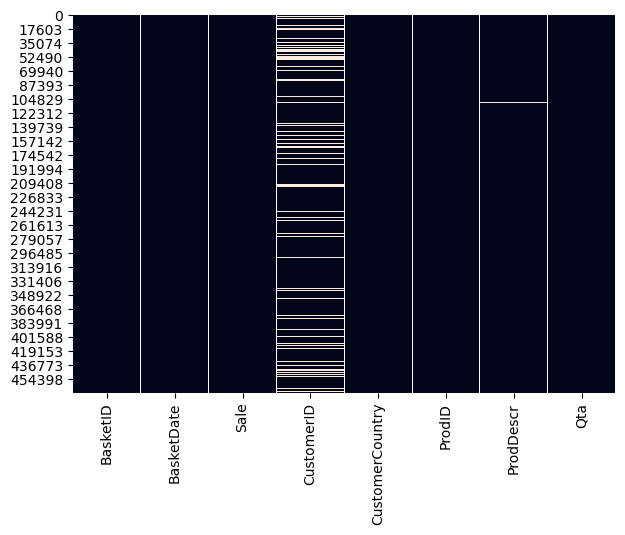

In [9]:
sns.heatmap(df.isnull(), cbar=False)

* ### Statistics of the two numerical attributes (Sale, Qta)

In [10]:
df.describe()

,Sale,Qta
count,466678.000000,466678.000000
mean,4.049057,10.806528
std,84.237135,232.627771
min,-11062.060000,-80995.000000
25%,1.250000,2.000000
50%,2.080000,4.000000
75%,3.750000,12.000000
max,38970.000000,80995.000000


# Some preliminary analisys

## General observation
* BasketID:
    * it appears to be a six digit code.
    * it has no null value.
    * is it alwais a six digit code?
    * it has particular combination to indicate some particular values? (ex. 000000 for a null BasketID)
* BasketDate:
    * it indicates the date of the Baskets.
    * BasketDates corresponding to the same BasketsID have the same values.
    * what are the various distributions?
* Sale:
    * indicates the unit price of an item.
    * it has a large (~11000) negative value.
    * it has a large (~38000) positive value.
    * it has no null values.
    * does it have a particular value to indicate a missing value or one with a specific meaning?
    * does the same article have the same price over the years?
* Customer:
    * the customer is a six digit code

## Baskets info
Define a "good BasketID" as a six digit code. Every other BasketID which isn't a six digit code is a "bad BasketID"

In [11]:
def good_bid(val):
    # Returns True is val is a good BasketID (i.e. six digit code), else False
    if len(val) == 6:
        if val.isnumeric():
            return True
    return False

In [12]:
gbid = df[df['BasketID'].apply(good_bid)]
bbid = df[~df['BasketID'].apply(good_bid)]
print('There are', gbid.shape[0], 'records with good BasketID and', bbid.shape[0], 'records with bad BasketID')
print('There are', gbid['BasketID'].nunique(), 'good baskets and', bbid['BasketID'].nunique(), 'bad baskets')

There are 457625 records with good BasketID and 9053 records with bad BasketID
There are 20871 good baskets and 3756 bad baskets


## Product info
Define a "good ProductID" as a five digit code followed by a variable number of characters. Every other ProdID which isn't a five digit code is a "bad ProdID"

In [13]:
def good_pid(val):
    if len(val) >= 5:
        if val[0:5].isnumeric():
            return True
    return False

In [14]:
df[(df['Qta'] < 0) & (df['BasketID'].apply(good_bid))]['ProdDescr'].unique()

<StringArray>
[                                 <NA>,                               'check',
                        'Dotcom sales',          'reverse 21/5/10 adjustment',
                'mouldy, thrown away.',                                   '?',
                        'label mix up',                     'samples/damages',
                         'thrown away',                             'damages',
                            'showroom',                'wrongly sold as sets',
                    'dotcom sold sets',                    'Amazon sold sets',
                   'wrongly sold sets',                      '?sold as sets?',
                     'damages/display',                       'damaged stock',
                            'damages?',                're dotcom quick fix.',
                        'sold in set?',           'POSSIBLE DAMAGES OR LOST?',
                             'damaged',                             'Damaged',
                             'DAMAGED'

### Qta < 0 & good bip => descrizione spazzatura => cancellabile
### Il contrario vale?

In [15]:
gpid = df[df['ProdID'].apply(good_pid)]
bpid = df.loc[~df['ProdID'].apply(good_pid)]
print('There are', gpid.shape[0], 'records with good ProdID and', bpid.shape[0], 'records with bad ProdID')
print('There are', gpid['ProdID'].nunique(), 'good ProdID and', bpid['ProdID'].nunique(), 'bad ProdID')

There are 464268 records with good ProdID and 2410 records with bad ProdID
There are 3924 good ProdID and 29 bad ProdID


In [16]:
for pid, data in bpid.groupby(bpid['ProdID']):
    print('PRODUCT:', pid)
    print('Size:\n\t', data.shape[0], sep='')
    descr_list = data['ProdDescr'].unique()
    print('Description:')
    for i in descr_list:
        print('\t', i, sep='')
    countr_list = data['CustomerCountry'].unique()
    print('Country')
    for i in countr_list:
        print('\t', i, sep='')
    print('Entries with null CustomerID:\n\t', data[data['CustomerID'].isnull()].shape[0], '/', data.shape[0], sep='')
    print('Entries with bad BasketTD:\n\t', data[~data['BasketID'].apply(good_pid)].shape[0], '/', data.shape[0], sep='')
    print('Entries with negative Qta:\n\t', data[data['Qta'] < 0].shape[0], '/', data.shape[0], sep='')
    print('Entries with Sale equal to zero:\n\t', data[data['Sale'] == 0].shape[0], '/', data.shape[0], sep='')
    print('------------------------------')

PRODUCT: AMAZONFEE
Size:
	17
Description:
	AMAZON FEE
Country
	United Kingdom
Entries with null CustomerID:
	17/17
Entries with bad BasketTD:
	16/17
Entries with negative Qta:
	16/17
Entries with Sale equal to zero:
	0/17
------------------------------
PRODUCT: B
Size:
	2
Description:
	Adjust bad debt
Country
	United Kingdom
Entries with null CustomerID:
	2/2
Entries with bad BasketTD:
	2/2
Entries with negative Qta:
	0/2
Entries with Sale equal to zero:
	0/2
------------------------------
PRODUCT: BANK CHARGES
Size:
	25
Description:
	Bank Charges
Country
	United Kingdom
Entries with null CustomerID:
	13/25
Entries with bad BasketTD:
	13/25
Entries with negative Qta:
	13/25
Entries with Sale equal to zero:
	0/25
------------------------------
PRODUCT: C2
Size:
	141
Description:
	CARRIAGE
Country
	EIRE
	United Kingdom
	Channel Islands
	France
Entries with null CustomerID:
	7/141
Entries with bad BasketTD:
	2/141
Entries with negative Qta:
	2/141
Entries with Sale equal to zero:
	0/141
-

In [17]:
bpid.describe()

,Sale,Qta
count,2410.000000,2410.000000
mean,185.376935,2.592946
std,1156.593208,63.957176
min,-11062.060000,-1350.000000
25%,15.000000,1.000000
50%,18.000000,1.000000
75%,50.000000,2.000000
max,38970.000000,1600.000000


In [18]:
bpid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2410 entries, 45 to 471909
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   BasketID         2410 non-null   object        
 1   BasketDate       2410 non-null   datetime64[ns]
 2   Sale             2410 non-null   float64       
 3   CustomerID       1916 non-null   object        
 4   CustomerCountry  2410 non-null   string        
 5   ProdID           2410 non-null   object        
 6   ProdDescr        2404 non-null   string        
 7   Qta              2410 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(3), string(2)
memory usage: 169.5+ KB


## DateTime properties

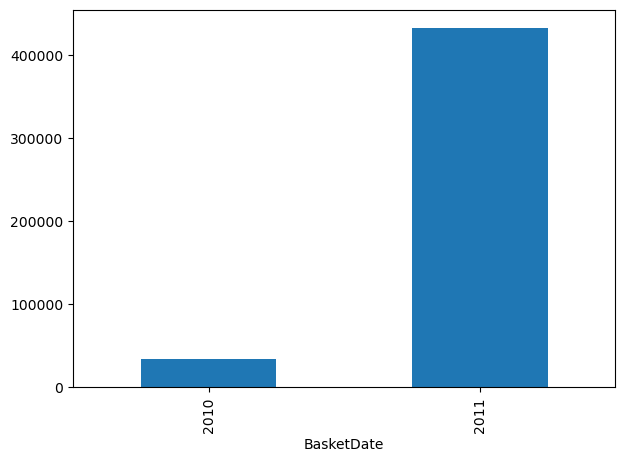

In [19]:
df['BasketDate'].groupby(df['BasketDate'].dt.year).count().plot(kind='bar')

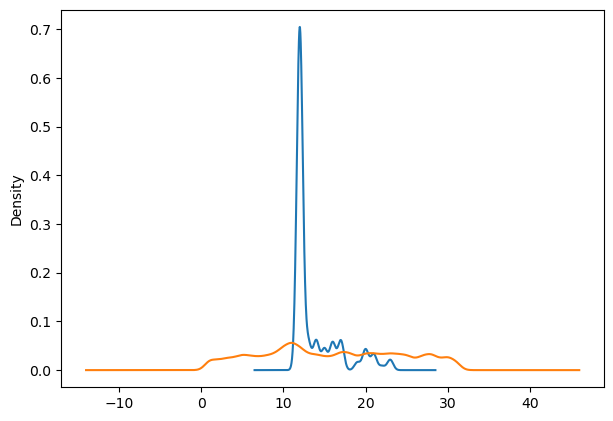

In [20]:
fig, ax = plt.subplots(1, 1)
df[df['BasketDate'].dt.year == 2010]['BasketDate'].dt.day.plot(kind='kde', ax=ax)
df[df['BasketDate'].dt.year == 2011]['BasketDate'].dt.day.plot(kind='kde', ax=ax)

## Observation
* 2010 data aren't enough representative, they are only a small fraction of the dataset and they appear to be only around the 12th of the month
* In contrast 2011's data are more uniformely distributed

# Filtering data
### Filters:
* Delete the rows with bad ProdID - small fraction of the dataset, semply the analisys (what's the meaning of M, S, D, POST, ecc... ?)
* Delete the rows with bad ProdDescr (i.e. Qta < 0 and good BasketID) - their ProductDescriptions are bad, i.e. 'damaged', 'lost', 'correction' ecc...
* Delete the rows with negative Sale (included in the first point)
* Delete null customers - the aim is to define the customer beheaviour meaning that is necessary to uniquely identify a customer, Null customers don't bring enough information
* Delete entries in 2010 - they aren't enought representative

In [21]:
df2 = df[df['ProdID'].apply(good_pid)] # Delete all the rows with bad ProdID
#--------------
to_del = df2[df2['Qta'] < 0] # Select all the rows with negative Qta
to_del = to_del[to_del['BasketID'].apply(good_bid)] # Select all the rows with negative Qta and good BasketID
df2 = df2.drop(index=to_del.index) # Delete all the rows with negative Qta and good BasketID (i.e. ProdDescr is trash)
#--------------
df2 = df2.dropna(subset=['CustomerID']) # Delete all the rows with null CustomerID
df2 = df2[df2['BasketDate'].dt.year == 2011]
df2

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
34393,539993,2011-04-01 10:00:00,1.95,13313,United Kingdom,22386,JUMBO BAG PINK POLKADOT,10
34394,539993,2011-04-01 10:00:00,0.42,13313,United Kingdom,21499,BLUE POLKADOT WRAP,25
34395,539993,2011-04-01 10:00:00,0.42,13313,United Kingdom,21498,RED RETROSPOT WRAP,25
34396,539993,2011-04-01 10:00:00,2.10,13313,United Kingdom,22379,RECYCLING BAG RETROSPOT,5
34397,539993,2011-04-01 10:00:00,1.25,13313,United Kingdom,20718,RED RETROSPOT SHOPPER BAG,10
...,...,...,...,...,...,...,...,...
471904,581587,2011-09-12 12:50:00,0.85,12680,France,22613,PACK OF 20 SPACEBOY NAPKINS,12
471905,581587,2011-09-12 12:50:00,2.10,12680,France,22899,CHILDREN'S APRON DOLLY GIRL,6
471906,581587,2011-09-12 12:50:00,4.15,12680,France,23254,CHILDRENS CUTLERY DOLLY GIRL,4
471907,581587,2011-09-12 12:50:00,4.15,12680,France,23255,CHILDRENS CUTLERY CIRCUS PARADE,4


In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373451 entries, 34393 to 471908
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   BasketID         373451 non-null  object        
 1   BasketDate       373451 non-null  datetime64[ns]
 2   Sale             373451 non-null  float64       
 3   CustomerID       373451 non-null  object        
 4   CustomerCountry  373451 non-null  string        
 5   ProdID           373451 non-null  object        
 6   ProdDescr        373451 non-null  string        
 7   Qta              373451 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(3), string(2)
memory usage: 25.6+ MB


In [23]:
#print('All the ProdID are good:', all(df2['ProdID'].apply(good_pid)))
#print('All the good BasketID have positive Qta:', all(df2[df2['BasketID'].apply(good_bid)]['Qta'] > 0))
#print('There are', df2[df2['BasketID'].apply(good_pid)].shape[0], 'good BasketID', 'and', df2[~df2['BasketID'].apply(good_pid)].shape[0], 'bad BasketID')

In [24]:
#for prod, data in df2.groupby(df2['ProdID']):
 #   print('Product:', prod)
  #  for sales, data2 in data.groupby(df2['Sale']):
   #     print('\t', f'{sales:5}', data2.shape[0])

### Resulting dataset
* No null CustomerID
* Only good ProdID
* Only good ProdDescr (definire un criterio per una descrizione buona, es: tutta uppercase)
* All the records with engative Qta have a BasketID starting with 'C'
* All the records are from 2011

In [25]:
#for i, data in df.groupby(df2['ProdID']):
 #   print('Product', i)
  #  for descr, data2 in data.groupby(data['ProdDescr']):
   #     print('\t', descr, data2['ProdDescr'].count())

In [26]:
df2.describe()

,Sale,Qta
count,373451.000000,373451.000000
mean,2.892024,12.299284
std,4.374359,258.755314
min,0.000000,-80995.000000
25%,1.250000,2.000000
50%,1.850000,5.000000
75%,3.750000,12.000000
max,649.500000,80995.000000


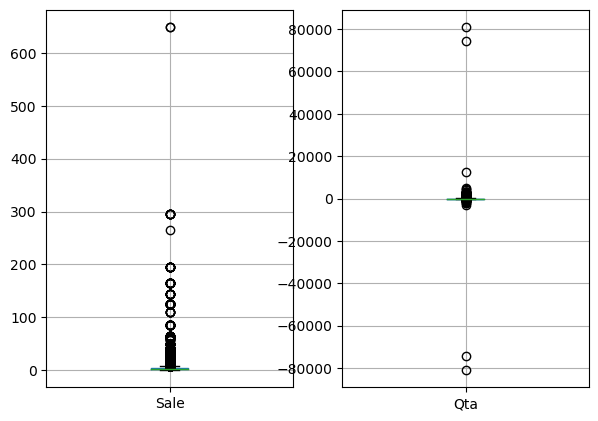

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2)
df2.boxplot(column=['Sale'], ax=ax1)
df2.boxplot(column=['Qta'], ax=ax2)

## Observation
* From the boxplot above it's clear that there are some outliers. Are they errors? Do they have any meaning?
* Regarding the attribute 'Qta' it's clear that for the two greater values there is the negative counterpart.

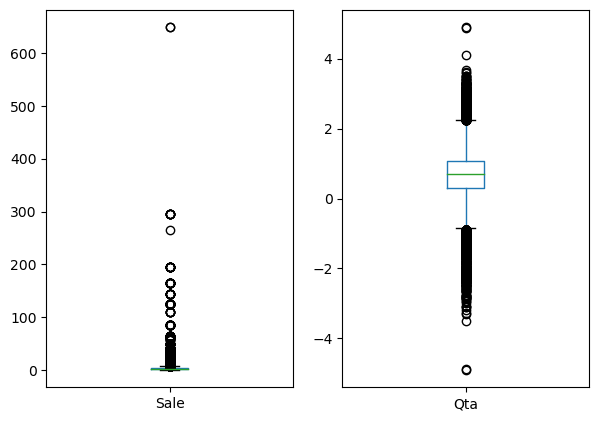

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2)
#df2.boxplot(column=['Sale'].apply(lambda x: np.log10(x) if x > 0 else -np.log10(-x)), ax=ax1)
df2['Sale'].plot.box(ax=ax1)
df2['Qta'].apply(lambda x: np.log10(x) if x > 0 else -np.log10(-x)).plot.box(ax=ax2)

## Observation
* Instead of focusing on the actual number of item purchased, we consider only the logarithm since it gives an idea of the order 

In [29]:
#p = 0.97
#perc1 = df2[df2['Qta'] > 0]['Qta'].quantile(p)
#perc2 = df2[df2['Qta'] < 0]['Qta'].quantile(1-p)
#df2 = df2.drop(df2[df2['Qta'] > perc1].index)
#df2 = df2.drop(df2[df2['Qta'] < perc2].index)
#df2.boxplot(column=['Qta'], ax=ax2)

In [30]:
#p = 0.97
#perc1 = df2[df2['Qta'] > 0]['Qta'].quantile(p)
#perc2 = df2[df2['Qta'] < 0]['Qta'].quantile(1-p)
#df2 = df2.drop(df2[df2['Qta'] > perc1].index)
#df2 = df2.drop(df2[df2['Qta'] < perc2].index)
#df2.boxplot(column=['Qta'])

In [31]:
#df2.boxplot(column=['Sale'])

In [32]:
#df2 = df2.drop(df2[df2['Sale'] > 600].index) # manually removing an outlier, it was a picnic case, probably an error
#df2.boxplot(column=['Sale'])

# Define new atributes
* Daytime category
* Price
* Drop BasketDate and define the attribute week

In [33]:
df2['DayTime'] = pd.cut(df2['BasketDate'].dt.hour, bins=[6, 9, 12, 15, 18, 21], labels=['Early morning', 'Morning', 'Luch time', 'Evening', 'Late evening'])
df2['TotalPrice'] = df2['Qta'].multiply(df2['Sale'])
df2['Week'] = df2['BasketDate'].dt.week

In [34]:
df2

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta,DayTime,TotalPrice,Week
34393,539993,2011-04-01 10:00:00,1.95,13313,United Kingdom,22386,JUMBO BAG PINK POLKADOT,10,Morning,19.50,13
34394,539993,2011-04-01 10:00:00,0.42,13313,United Kingdom,21499,BLUE POLKADOT WRAP,25,Morning,10.50,13
34395,539993,2011-04-01 10:00:00,0.42,13313,United Kingdom,21498,RED RETROSPOT WRAP,25,Morning,10.50,13
34396,539993,2011-04-01 10:00:00,2.10,13313,United Kingdom,22379,RECYCLING BAG RETROSPOT,5,Morning,10.50,13
34397,539993,2011-04-01 10:00:00,1.25,13313,United Kingdom,20718,RED RETROSPOT SHOPPER BAG,10,Morning,12.50,13
...,...,...,...,...,...,...,...,...,...,...,...
471904,581587,2011-09-12 12:50:00,0.85,12680,France,22613,PACK OF 20 SPACEBOY NAPKINS,12,Morning,10.20,37
471905,581587,2011-09-12 12:50:00,2.10,12680,France,22899,CHILDREN'S APRON DOLLY GIRL,6,Morning,12.60,37
471906,581587,2011-09-12 12:50:00,4.15,12680,France,23254,CHILDRENS CUTLERY DOLLY GIRL,4,Morning,16.60,37
471907,581587,2011-09-12 12:50:00,4.15,12680,France,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,Morning,16.60,37


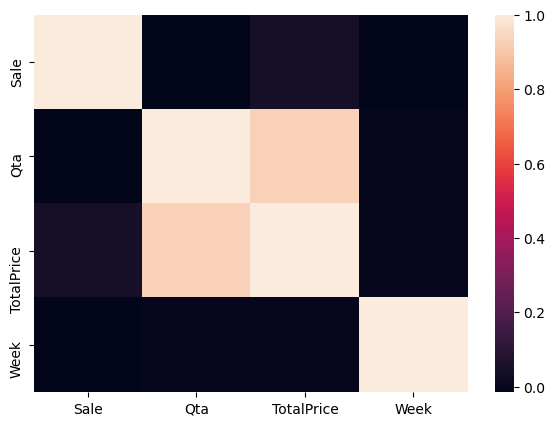

In [35]:
sns.heatmap(df2.corr())

## Observation
* There is no correlation between the week and both Qta and TotalPrice

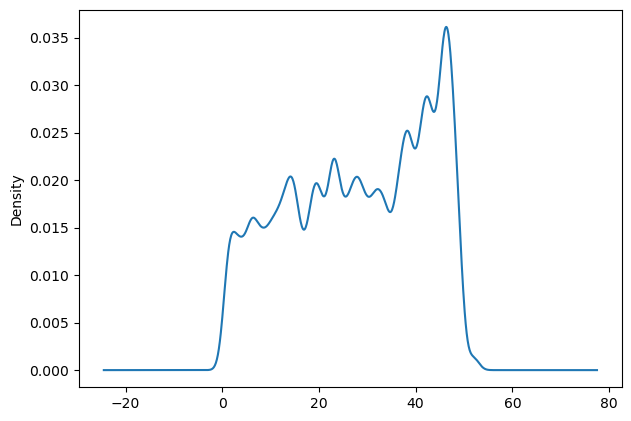

In [36]:
df2['Week'].plot(kind='kde')

# Obiettivo: tracciare il profilo del cliente
## Che informazioni possono essere utili?
* Informazioni sul cliente
    * Nazionalità
    * Orario della giornata
    * Frequenza giornaliera/settimanale/mensile
    * Quantità media di prodotti che acquista ogni volta
    * Quantità totale di prodotti acquistati
    * Quantità massima di prodotti acquistati
    * Spesa media giornaliera/settimanale/mensile
    * Top-k prodotti per quantità e per importo
    * Frequenza prodotti acquistati
* Informazioni sul prodotto
    * Descrizione
    * Categoria (?)
    * Costo
    * Quantità media acquistata
    * Periodo di massimo acquisto (divisione settimanale?)
* Informazioni sulla data
    * Distribuzione affluenza
* Informazioni sul basket
    * Prodotti comprati insieme
    * Reso (?)
    * Debito (?)

# Extract CustomerID information

### There exist records with null CustomerID. Since we don't know whether those rows correspond to one or more customer, the first approach is to ignore them, considering only non-null ID's.
A future implementation could be to infer the customer's profile of them based on previous analisys.

In [37]:
customers = pd.DataFrame({'CustomerID': df2['CustomerID'].unique()})
customers = customers.astype({'CustomerID': 'object'})

## CustomerID info: extract nationality

### Search general information about the CustomerCountry
* How many countries are there?
* Are there any null value?
* Is there a special value to identify a missing value?

In [38]:
all(df2['CustomerCountry'].notnull()) # Rember that df2 is the dataframe without null customers

True

There are no null values.

In [39]:
print('There are', df2['CustomerCountry'].unique().shape[0], 'distinct value for the customer\'s country.')
dict_countr = {}
for val in df2['CustomerCountry'].unique():
    dict_countr[val] = df2[df2['CustomerCountry'] == val].shape[0]
#for countr, freq in sorted(dict_countr.items(), key=lambda x: x[1], reverse=True): 
 #   print(f'{countr:23}: ', freq, '/', df2.shape[0], sep='')

There are 36 distinct value for the customer's country.


From the previous analisys it's possible to see that most of the rows (with nonnull CustomerID) have a CustomerCountry equal to 'United Kingdom'. Moreover exist values which aren't clear, in particular those values are 'European Community' and 'Unspecified'. While 'Unspecified' clearly indicates that a customer hasn't specified its country in the purchase of an item, the value 'European Community' is ambiguous.

### Are there any customer with multiple nationality?
If so, for every customer with more nationalities, search for the contry with the most number of purchase (baskets) and substitute it with the others.

From the fact that exist special values like 'Undefined' and 'European Community' some particular observation are necessary:
* if a customer is associated with a single country value, assign that value to the customer.
* if a customer have multiple countries associated, assign the the country with the most associated baskets (ATTENTION! not item purchased)
* if a customer have multiple countries associated and one (both) of them is (are) 'Undefined' or (and) 'European Community', then
    * if it has one or more countries different from 'Undefined' or 'European Community', assign the most frequent one
    * if it has only 'Undefined' or 'Eurpean Community' assign 'European Community'

In [40]:
dict_nats = {} # dictionary containing couple id: country 
groups = df2.groupby(df2['CustomerID']) # Group all the rows by CustomerID
for name, group in groups:
    basks = group['BasketID'].groupby(group['CustomerCountry']).unique() # For each customer, group the BasketID w.r.t. the country and count the number of unique values
    if basks.shape[0] > 1:
#PRINT  print('The customer ', str(name), ' made:', sep='')
        countries = basks.index.tolist() # Is this even necessary?
        maxm = 0
        mcountr = ''
        for country in countries:
            #TODO: consider also 'European Community' and 'Undefined'
            # Since the only cases where a customer have multiple nationalities don't include neither 'Unspecifies' and 'Eurpean Community', the code works anyway
            if maxm < basks[country].shape[0]:
                mcountr, maxm = country, basks[country].shape[0]
#PRINT      print('\t', basks[country].shape[0], ' purchase in ', country, sep='')
            # Choose the nationality with the greater number of purchase
#PRINT  print('\tmax: ', maxm, ', country: ', mcountr, sep='')
        countries.remove(mcountr)
#PRINT  print('\tlow countries: ', countries, sep='')
        df2.loc[df2['CustomerID'] == name, 'CustomerCountry'] = mcountr # NOT SURE! Maybe a better way
        dict_nats[name] = mcountr
    else:
        dict_nats[name] = basks.index[0]

In [41]:
customers['Country'] = customers['CustomerID'].map(dict_nats)
customers

,CustomerID,Country
0,13313,United Kingdom
1,18097,United Kingdom
2,16656,United Kingdom
3,16875,United Kingdom
4,13094,United Kingdom
...,...,...
4227,13436,United Kingdom
4228,15520,United Kingdom
4229,13298,United Kingdom
4230,14569,United Kingdom


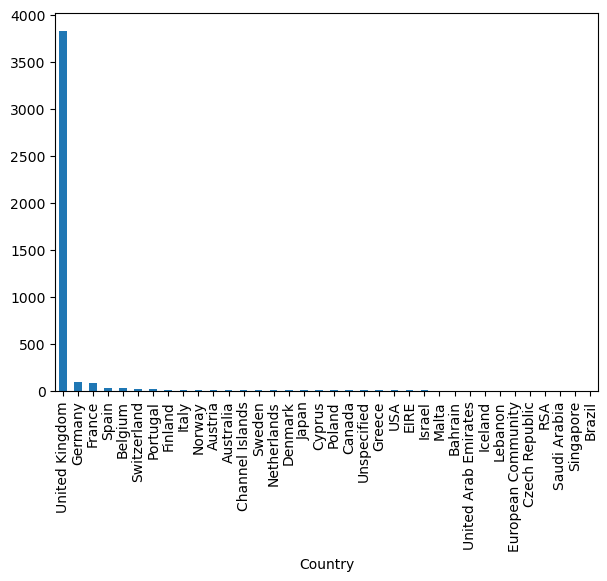

In [42]:
countr_freq = customers['CustomerID'].groupby(customers["Country"]).count().sort_values(ascending=False)
countr_freq.plot(kind='bar')

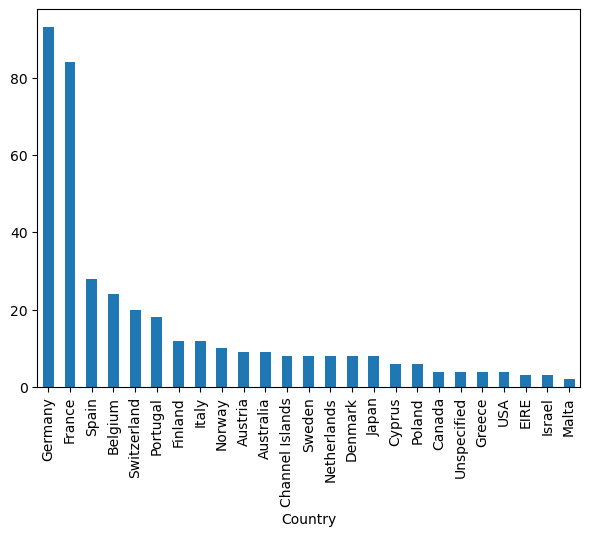

In [43]:
countr_freq['Germany':'Malta'].plot(kind='bar')

## CustomerID info: 
* Extract the number of baskets per customer
* Extract the number of bad baskets per customer
* Extract the number of purchased product
* Extract the number of product bought
* Extract the number of product returned
* Extract the money spent for each customer
* Extract the money refunded

In [44]:
print('There are', df2['BasketID'].unique().shape[0], 'distinct BasketID')
basks = df2.groupby(df2['CustomerID'])['BasketID'].nunique() # Total number of baskets (both good and bad)
bad_basks = df2.groupby(df2[~df2['BasketID'].apply(good_bid)]['CustomerID'])['BasketID'].nunique() # Total number of bad baskets
prods = df2.groupby(df2['CustomerID'])['ProdID'].nunique() # Number of different product bought
qtas = df2.groupby(df2[df2['BasketID'].apply(good_bid)]['CustomerID'])['Qta'].sum() # Total positive Qta
neg_qtas = df2.groupby(df2[~df2['BasketID'].apply(good_bid)]['CustomerID'])['Qta'].sum() # Total negative Qta
spent = df2.groupby(df2[df2['BasketID'].apply(good_bid)]['CustomerID'])['TotalPrice'].sum() # Total money spent
neg_spent = df2.groupby(df2[~df2['BasketID'].apply(good_bid)]['CustomerID'])['TotalPrice'].sum() # Total money refunded

There are 20097 distinct BasketID


In [45]:
customers['NumBaskets'] = customers['CustomerID'].map(basks)
customers['NumBadBasks'] = customers['CustomerID'].map(bad_basks)
customers['NumProd'] = customers['CustomerID'].map(prods)
customers['Qta'] = customers['CustomerID'].map(qtas)
customers['NegQta'] = customers['CustomerID'].map(neg_qtas)
customers['TotSpent'] = customers['CustomerID'].map(spent)
customers['TotNegSpent'] = customers['CustomerID'].map(neg_spent)
customers.fillna(value=0, axis=1, inplace=True)
customers

,CustomerID,Country,NumBaskets,NumBadBasks,NumProd,Qta,NegQta,TotSpent,TotNegSpent
0,13313.0,United Kingdom,5,0.0,47,851.0,0.0,1555.32,0.00
1,18097.0,United Kingdom,6,1.0,65,1406.0,-1.0,2479.88,-4.95
2,16656.0,United Kingdom,20,6.0,14,8498.0,-21.0,8197.04,-57.56
3,16875.0,United Kingdom,9,4.0,94,1069.0,-25.0,2095.53,-72.06
4,13094.0,United Kingdom,15,4.0,4,1524.0,-174.0,1703.64,-218.46
...,...,...,...,...,...,...,...,...,...
4227,13436.0,United Kingdom,1,0.0,12,76.0,0.0,196.89,0.00
4228,15520.0,United Kingdom,1,0.0,18,314.0,0.0,343.50,0.00
4229,13298.0,United Kingdom,1,0.0,2,96.0,0.0,360.00,0.00
4230,14569.0,United Kingdom,1,0.0,10,79.0,0.0,227.39,0.00


In [46]:
bad_customers = customers[customers['Qta'] < customers['NegQta'].apply(np.abs)]
bad_customers

,CustomerID,Country,NumBaskets,NumBadBasks,NumProd,Qta,NegQta,TotSpent,TotNegSpent
37,15973.0,United Kingdom,2,2.0,1,0.0,-19.0,0.00,-208.05
111,15823.0,United Kingdom,1,1.0,15,0.0,-282.0,0.00,-811.86
472,13693.0,United Kingdom,2,2.0,4,0.0,-6.0,0.00,-32.00
785,14627.0,United Kingdom,1,1.0,5,0.0,-5.0,0.00,-21.85
966,17850.0,United Kingdom,1,1.0,9,0.0,-37.0,0.00,-87.73
971,12967.0,United Kingdom,2,2.0,14,0.0,-195.0,0.00,-466.15
989,15638.0,United Kingdom,1,1.0,2,0.0,-52.0,0.00,-94.00
990,12943.0,United Kingdom,1,1.0,1,0.0,-1.0,0.00,-3.75
1360,12755.0,Japan,2,1.0,4,3.0,-624.0,17.55,-1591.20
1519,16061.0,United Kingdom,1,1.0,1,0.0,-1.0,0.00,-29.95


### Delete those customers, because they made a small number of baskets, returner more quantity than they bought

In [47]:
customers.drop(index=bad_customers.index, inplace=True)

In [48]:
customers['ActualQta'] = customers['Qta'].add(customers['NegQta'])
customers['ActualSpent'] = customers['TotSpent'].add(customers['TotNegSpent'])

In [49]:
print(customers['ActualQta'].describe())
print(customers['ActualSpent'].describe())

count      4214.000000
mean       1090.325581
std        4535.607762
min           0.000000
25%         154.250000
50%         367.000000
75%         949.500000
max      190419.000000
Name: ActualQta, dtype: float64
count    4.214000e+03
mean     1.832357e+03
std      7.949375e+03
min     -6.821210e-13
25%      2.942925e+02
50%      6.399000e+02
75%      1.550138e+03
max      2.702011e+05
Name: ActualSpent, dtype: float64


In [50]:
customers

,CustomerID,Country,NumBaskets,NumBadBasks,NumProd,Qta,NegQta,TotSpent,TotNegSpent,ActualQta,ActualSpent
0,13313.0,United Kingdom,5,0.0,47,851.0,0.0,1555.32,0.00,851.0,1555.32
1,18097.0,United Kingdom,6,1.0,65,1406.0,-1.0,2479.88,-4.95,1405.0,2474.93
2,16656.0,United Kingdom,20,6.0,14,8498.0,-21.0,8197.04,-57.56,8477.0,8139.48
3,16875.0,United Kingdom,9,4.0,94,1069.0,-25.0,2095.53,-72.06,1044.0,2023.47
4,13094.0,United Kingdom,15,4.0,4,1524.0,-174.0,1703.64,-218.46,1350.0,1485.18
...,...,...,...,...,...,...,...,...,...,...,...
4227,13436.0,United Kingdom,1,0.0,12,76.0,0.0,196.89,0.00,76.0,196.89
4228,15520.0,United Kingdom,1,0.0,18,314.0,0.0,343.50,0.00,314.0,343.50
4229,13298.0,United Kingdom,1,0.0,2,96.0,0.0,360.00,0.00,96.0,360.00
4230,14569.0,United Kingdom,1,0.0,10,79.0,0.0,227.39,0.00,79.0,227.39


### Remove all the customers with ActuaQta equal to zero since they hand't bought anything

In [51]:
customers = customers[customers['ActualQta'] > 0]

In [52]:
customers['ActualQta'].describe()

count      4200.000000
mean       1093.960000
std        4542.724921
min           1.000000
25%         156.000000
50%         369.000000
75%         950.000000
max      190419.000000
Name: ActualQta, dtype: float64

In [53]:
customers['ActualSpent'].describe()

count      4200.000000
mean       1838.464676
std        7961.911236
min           0.000000
25%         296.927500
50%         643.215000
75%        1554.397500
max      270201.140000
Name: ActualSpent, dtype: float64

# guardare actual spent == 0

In [54]:
customers = customers[customers['ActualSpent'] > 0]

In [55]:
#customers['ActualQta'].apply(np.log10).plot(kind='kde')

In [56]:
#customers['ActualSpent'].apply(np.log10).plot(kind='kde')

In [57]:
#plt.scatter(x=customers['ActualSpent'].apply(np.log10), y=customers['ActualQta'].apply(np.log10))

In [58]:
customers['AvgPrice'] = customers['ActualSpent'].divide(customers['ActualQta'])
customers

,CustomerID,Country,NumBaskets,NumBadBasks,NumProd,Qta,NegQta,TotSpent,TotNegSpent,ActualQta,ActualSpent,AvgPrice
0,13313.0,United Kingdom,5,0.0,47,851.0,0.0,1555.32,0.00,851.0,1555.32,1.827638
1,18097.0,United Kingdom,6,1.0,65,1406.0,-1.0,2479.88,-4.95,1405.0,2474.93,1.761516
2,16656.0,United Kingdom,20,6.0,14,8498.0,-21.0,8197.04,-57.56,8477.0,8139.48,0.960184
3,16875.0,United Kingdom,9,4.0,94,1069.0,-25.0,2095.53,-72.06,1044.0,2023.47,1.938190
4,13094.0,United Kingdom,15,4.0,4,1524.0,-174.0,1703.64,-218.46,1350.0,1485.18,1.100133
...,...,...,...,...,...,...,...,...,...,...,...,...
4227,13436.0,United Kingdom,1,0.0,12,76.0,0.0,196.89,0.00,76.0,196.89,2.590658
4228,15520.0,United Kingdom,1,0.0,18,314.0,0.0,343.50,0.00,314.0,343.50,1.093949
4229,13298.0,United Kingdom,1,0.0,2,96.0,0.0,360.00,0.00,96.0,360.00,3.750000
4230,14569.0,United Kingdom,1,0.0,10,79.0,0.0,227.39,0.00,79.0,227.39,2.878354


In [59]:
customers['AvgBasksValue'] = customers['ActualSpent'].divide(customers['NumBaskets'].subtract(customers['NumBadBasks']))
customers

,CustomerID,Country,NumBaskets,NumBadBasks,NumProd,Qta,NegQta,TotSpent,TotNegSpent,ActualQta,ActualSpent,AvgPrice,AvgBasksValue
0,13313.0,United Kingdom,5,0.0,47,851.0,0.0,1555.32,0.00,851.0,1555.32,1.827638,311.064000
1,18097.0,United Kingdom,6,1.0,65,1406.0,-1.0,2479.88,-4.95,1405.0,2474.93,1.761516,494.986000
2,16656.0,United Kingdom,20,6.0,14,8498.0,-21.0,8197.04,-57.56,8477.0,8139.48,0.960184,581.391429
3,16875.0,United Kingdom,9,4.0,94,1069.0,-25.0,2095.53,-72.06,1044.0,2023.47,1.938190,404.694000
4,13094.0,United Kingdom,15,4.0,4,1524.0,-174.0,1703.64,-218.46,1350.0,1485.18,1.100133,135.016364
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4227,13436.0,United Kingdom,1,0.0,12,76.0,0.0,196.89,0.00,76.0,196.89,2.590658,196.890000
4228,15520.0,United Kingdom,1,0.0,18,314.0,0.0,343.50,0.00,314.0,343.50,1.093949,343.500000
4229,13298.0,United Kingdom,1,0.0,2,96.0,0.0,360.00,0.00,96.0,360.00,3.750000,360.000000
4230,14569.0,United Kingdom,1,0.0,10,79.0,0.0,227.39,0.00,79.0,227.39,2.878354,227.390000


In [98]:
customers2 = customers.loc[:, ['CustomerID', 'ActualQta', 'ActualSpent', 'AvgPrice', 'AvgBasksValue']]
customers2['YearFreq'] = (customers['NumBaskets'].subtract(customers['NumBadBasks'])).divide(12)
customers2

,CustomerID,ActualQta,ActualSpent,AvgPrice,AvgBasksValue,YearFreq
0,13313.0,851.0,1555.32,1.827638,311.064000,0.416667
1,18097.0,1405.0,2474.93,1.761516,494.986000,0.416667
2,16656.0,8477.0,8139.48,0.960184,581.391429,1.166667
3,16875.0,1044.0,2023.47,1.938190,404.694000,0.416667
4,13094.0,1350.0,1485.18,1.100133,135.016364,0.916667
...,...,...,...,...,...,...
4227,13436.0,76.0,196.89,2.590658,196.890000,0.083333
4228,15520.0,314.0,343.50,1.093949,343.500000,0.083333
4229,13298.0,96.0,360.00,3.750000,360.000000,0.083333
4230,14569.0,79.0,227.39,2.878354,227.390000,0.083333


In [99]:
customers2.describe()

,CustomerID,ActualQta,ActualSpent,AvgPrice,AvgBasksValue,YearFreq
count,4199.000000,4199.000000,4199.00000,4199.000000,4199.000000,4199.000000
mean,15291.857585,1091.234103,1838.90251,2.369028,373.566425,0.337263
std,1718.181242,4539.829279,7962.80891,11.539841,471.567502,0.587739
min,12347.000000,1.000000,2.90000,0.085619,1.450000,0.083333
25%,13811.500000,156.000000,297.03500,1.371114,173.895000,0.083333
50%,15286.000000,369.000000,643.63000,1.766957,287.400000,0.166667
75%,16770.500000,950.000000,1554.42500,2.295627,425.990962,0.333333
max,18287.000000,190419.000000,270201.14000,649.500000,13206.500000,15.416667


In [101]:
customers2[customers2['ActualSpent'] == customers2['ActualSpent'].max()]

,CustomerID,ActualQta,ActualSpent,AvgPrice,AvgBasksValue,YearFreq
386,14646.0,190419.0,270201.14,1.418982,3805.649859,5.916667


In [102]:
customers2['logQta'] = customers2['ActualQta'].apply(np.log10)
customers2['logSpent'] = customers2['ActualSpent'].apply(np.log10)
customers2.drop(columns=['ActualQta', 'ActualSpent'], inplace=True)
customers2

,CustomerID,AvgPrice,AvgBasksValue,YearFreq,logQta,logSpent
0,13313.0,1.827638,311.064000,0.416667,2.929930,3.191820
1,18097.0,1.761516,494.986000,0.416667,3.147676,3.393563
2,16656.0,0.960184,581.391429,1.166667,3.928242,3.910597
3,16875.0,1.938190,404.694000,0.416667,3.018700,3.306097
4,13094.0,1.100133,135.016364,0.916667,3.130334,3.171779
...,...,...,...,...,...,...
4227,13436.0,2.590658,196.890000,0.083333,1.880814,2.294224
4228,15520.0,1.093949,343.500000,0.083333,2.496930,2.535927
4229,13298.0,3.750000,360.000000,0.083333,1.982271,2.556303
4230,14569.0,2.878354,227.390000,0.083333,1.897627,2.356771


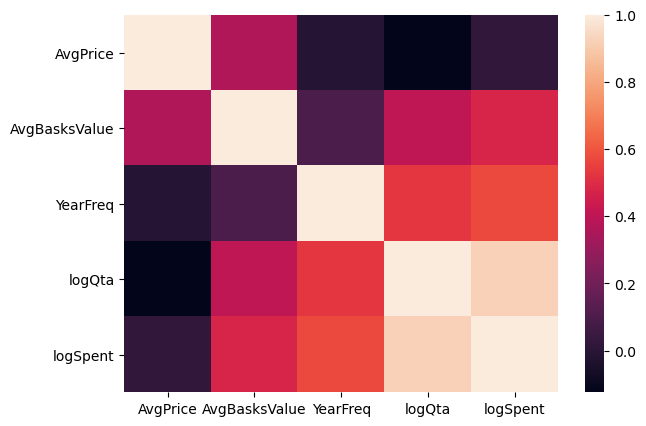

In [103]:
sns.heatmap(customers2.loc[:, 'AvgPrice':].corr())

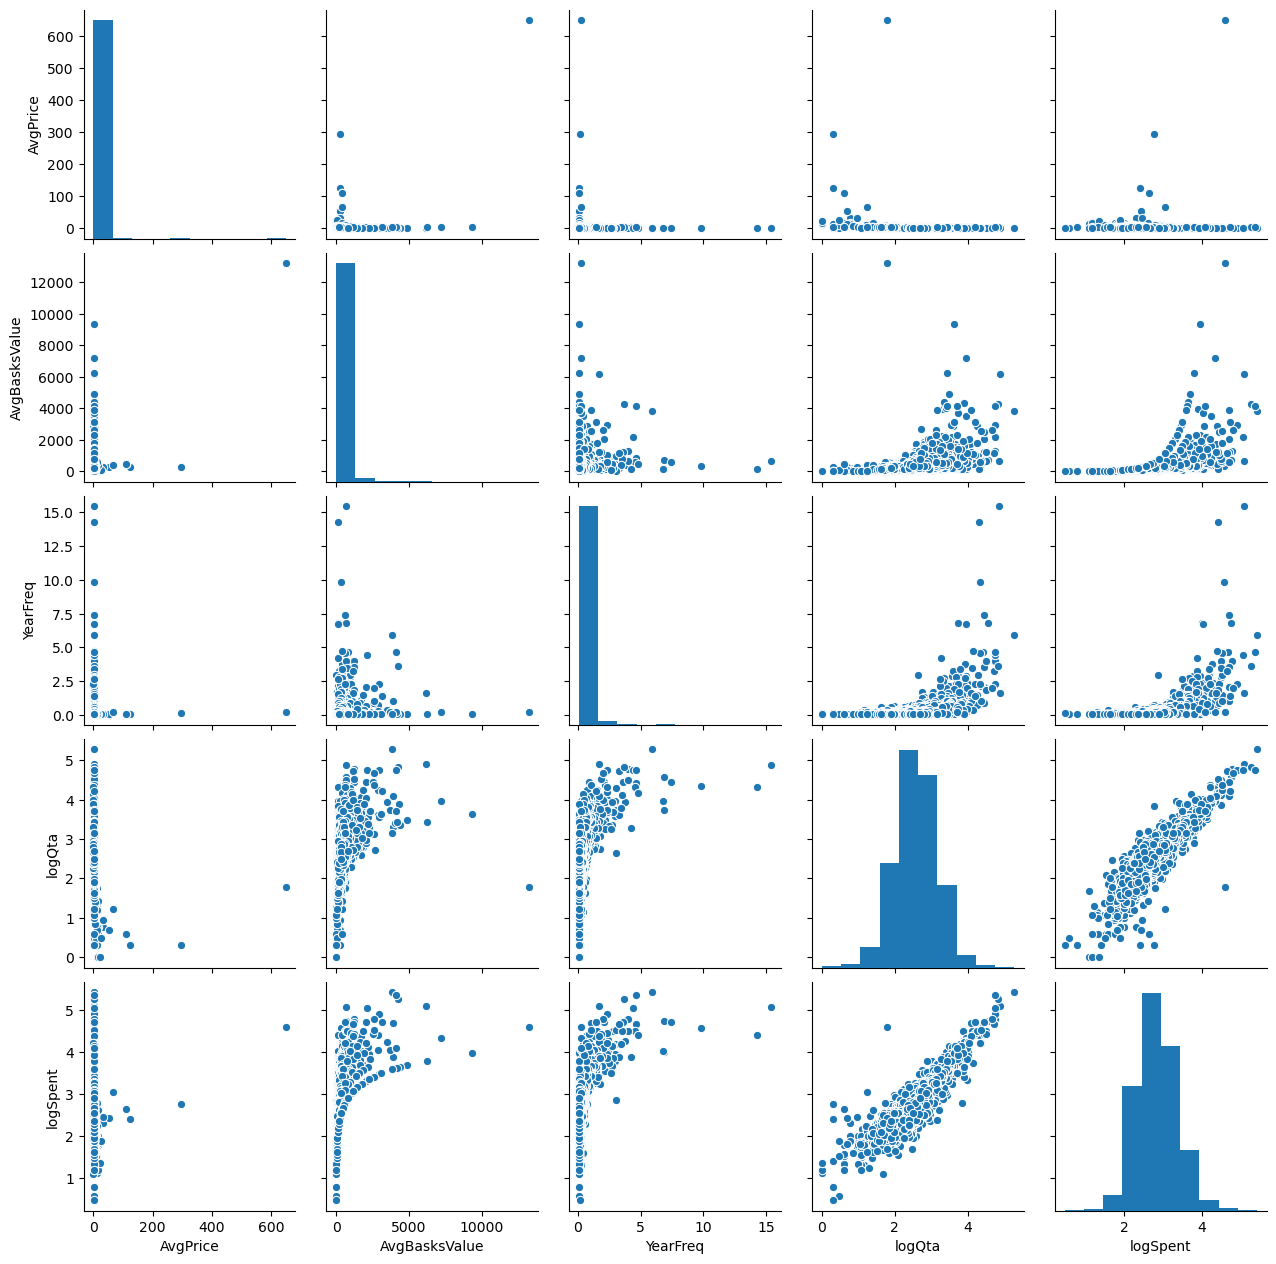

In [104]:
sns.pairplot(customers2.loc[:, 'AvgPrice':])

# ==========================================================
# STOP QUA

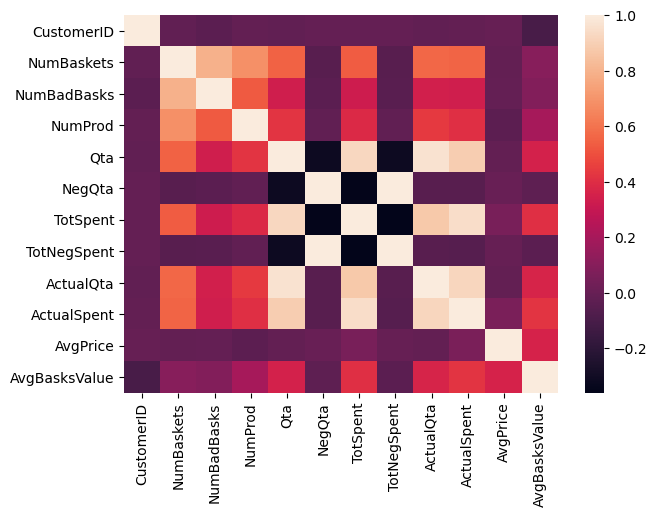

In [65]:
customers.corr()
sns.heatmap(customers.corr())

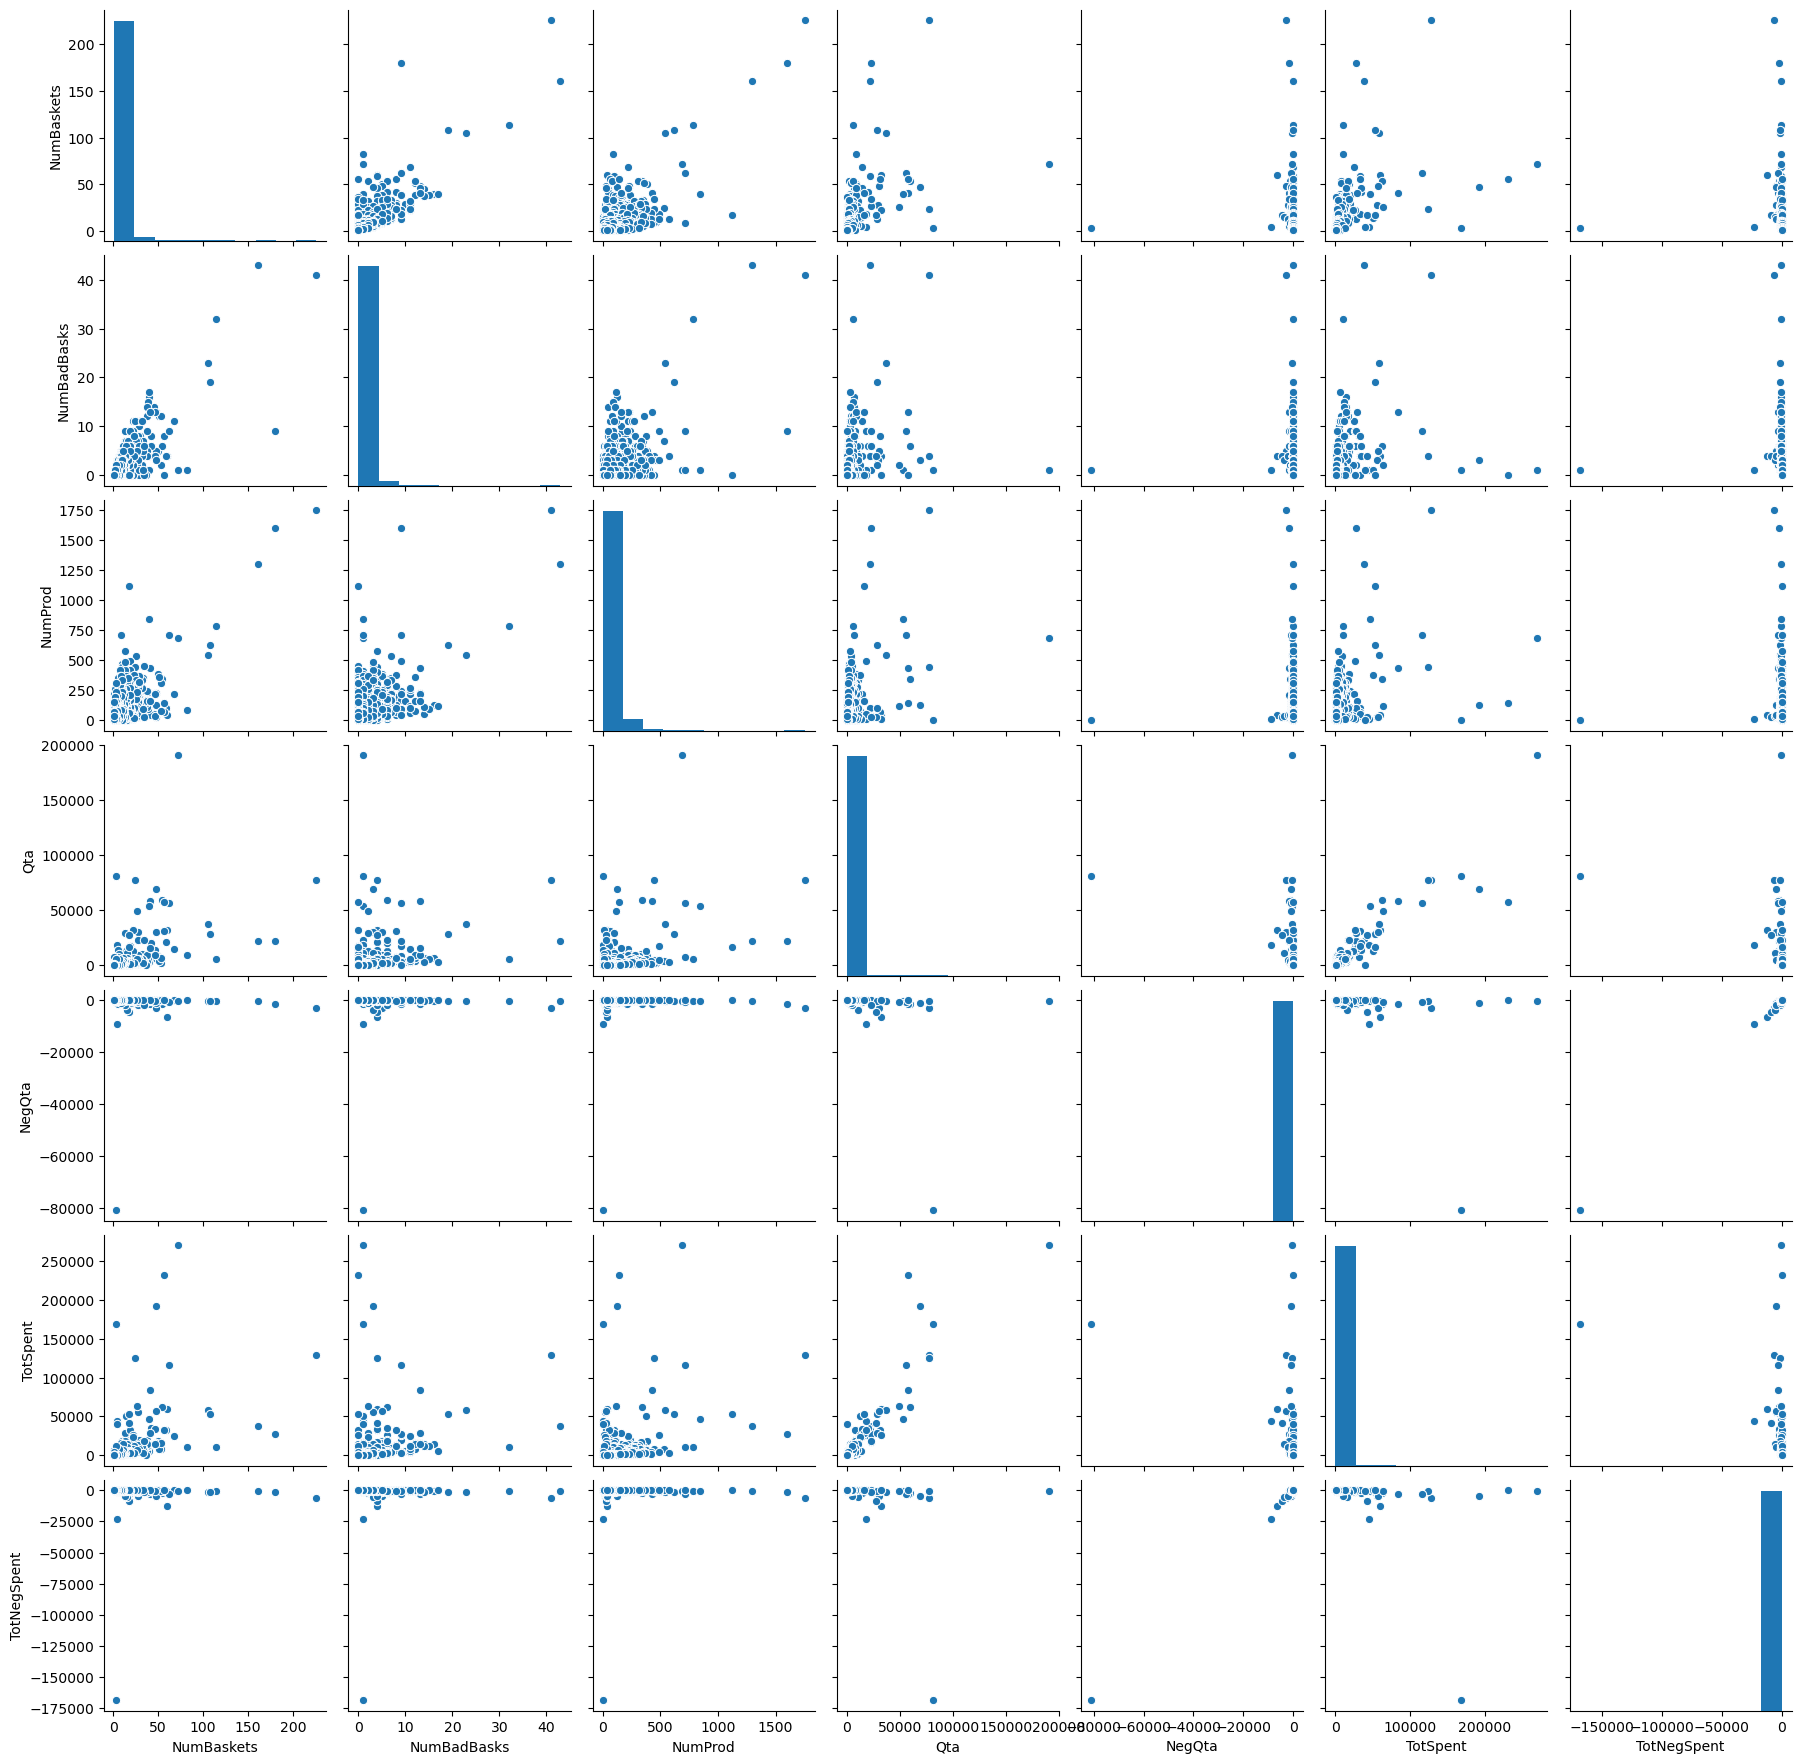

In [66]:
sns.pairplot(customers.loc[:, 'NumBaskets':'TotNegSpent'])

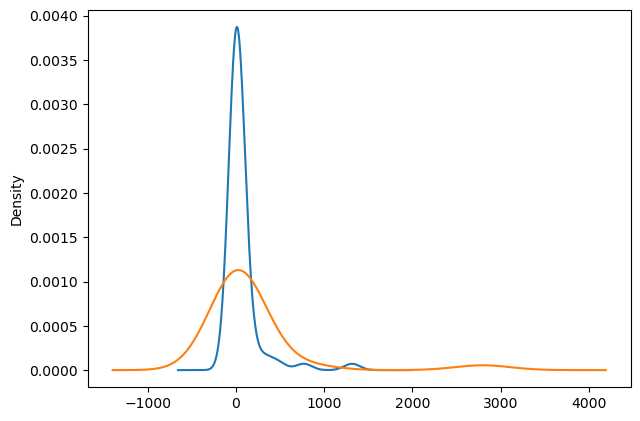

In [67]:
# MAYBE A BETTER WAY TO WRITE
fig, ax = plt.subplots(1, 1)
customers['CustomerID'].groupby(customers['NumBaskets']).count().plot(kind='kde', ax=ax)
customers['CustomerID'].groupby(customers['NumBadBasks']).count().plot(kind='kde', ax=ax)

In [68]:
customers['NumBaskets'].quantile([0.25, 0.50, 0.75, 0.9])

0.25     1.0
0.50     3.0
0.75     5.0
0.90    10.0
Name: NumBaskets, dtype: float64

### Observation
* The plot above shows that almost all the customers made just one Basket in the period of objservation. Moreover 90% of the customers made just 10 baskets in one year, meaning less than once a month. This means that it's not possible to compute the BRE (look at Behavioral Entropy and Profitability in Retail) since it was supported by the fact that a customer made more purchase during the period of observation. A solution could be to consider more years but the 2010's data aren't enought representative.

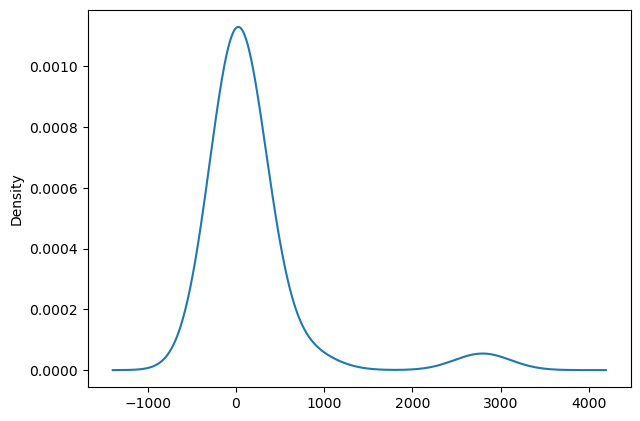

In [69]:
#b = customers['CustomerID'].groupby(customers['NumBadBasks']).count()#.plot(kind='bar')
#plt.scatter(b.index, b)
customers['CustomerID'].groupby(customers['NumBadBasks']).count().plot(kind='kde')

In [70]:
customers['NumBadBasks'].quantile([0.25, 0.50, 0.75, 0.9])

0.25    0.0
0.50    0.0
0.75    1.0
0.90    2.0
Name: NumBadBasks, dtype: float64

### Observation
* The plot above shows the distribution of bad baskets, in particular it looks like the bad baskets follows the same distribution of the total baskets meaning that more that half of the customers never made a bad basket (refund?) and 90% of the customers made at most two.

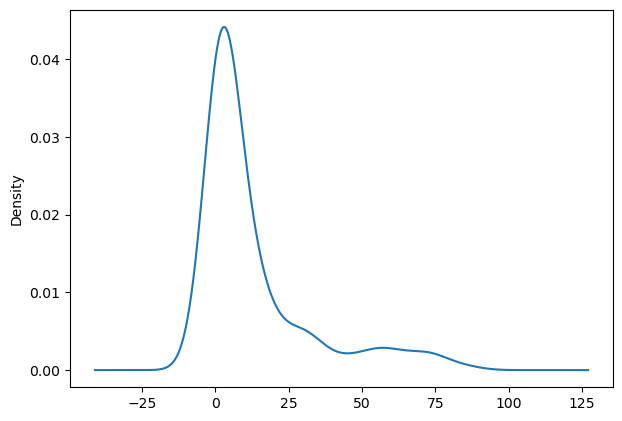

In [71]:
customers['CustomerID'].groupby(customers['NumProd']).count().plot(kind='kde')

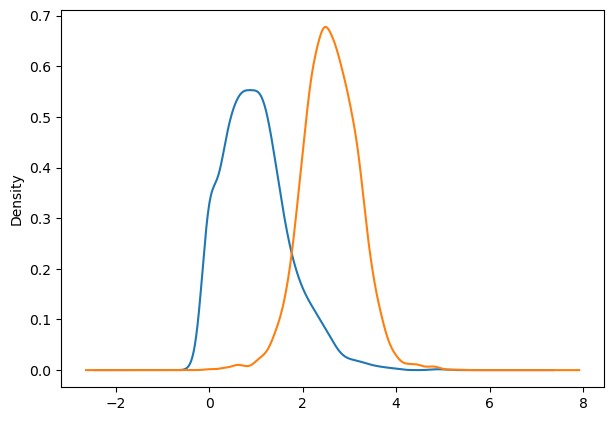

In [72]:
fig, ax = plt.subplots(1, 1)
customers[customers['NegQta'] < 0]['NegQta'].apply(lambda x: -x).apply(np.log10).plot(kind='kde', ax=ax, label='Neg')
customers[customers['Qta'] > 0]['Qta'].apply(np.log10).plot(kind='kde', ax=ax, label='Pos')

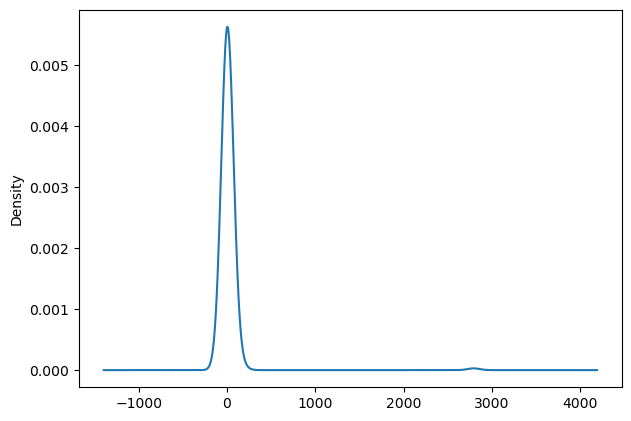

In [73]:
customers['CustomerID'].groupby(customers['NegQta']).count().plot(kind='kde')

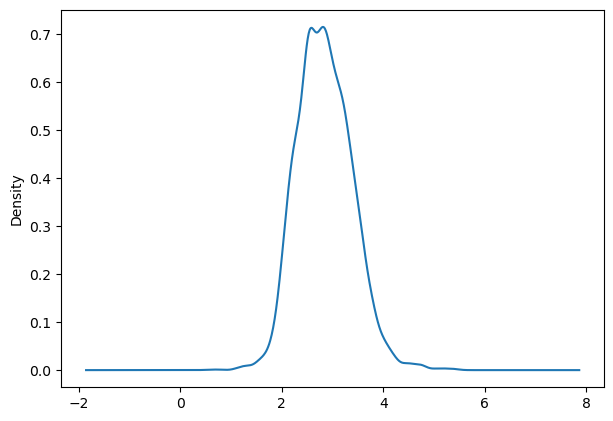

In [74]:
fig, ax = plt.subplots(1, 1)
customers[customers['TotSpent'] > 0]['TotSpent'].apply(np.log10).plot(kind='kde', ax=ax)

In [75]:
customers['TotSpent'].describe()

count      4199.000000
mean       1926.004632
std        8523.755240
min           3.750000
25%         302.150000
50%         656.250000
75%        1584.515000
max      270561.140000
Name: TotSpent, dtype: float64

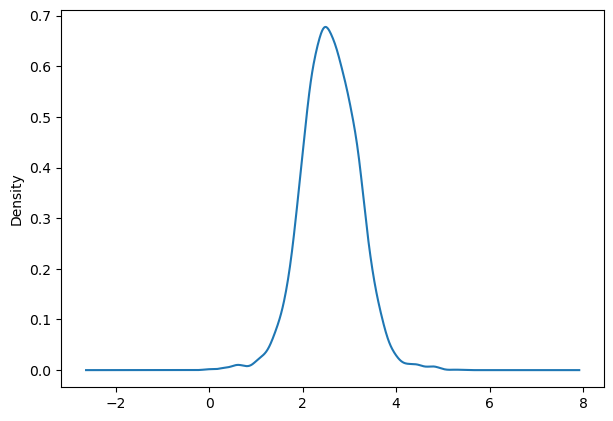

In [76]:
customers[customers['Qta'] > 0]['Qta'].apply(np.log10).plot(kind='kde')

In [77]:
df2[df2['Qta'] == 0]

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta,DayTime,TotalPrice,Week


### Some statistics about the baskets

In [78]:
print(customers['NumBaskets'].describe())
print('Mean: ', customers['NumBaskets'].mean())
print('Mode:', customers['NumBaskets'].mode())
print('Median:', customers['NumBaskets'].median())
print('Max:', customers['NumBaskets'].max())

count    4199.000000
mean        4.773279
std         8.440868
min         1.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       226.000000
Name: NumBaskets, dtype: float64
Mean:  4.77327935222672
Mode: 0    1
dtype: int64
Median: 3.0
Max: 226


### CustomerCountry statistics
Over all the customer with a specified CustomerID, compute some staitistics.

In [79]:
countr_freq = customers['CustomerID'].groupby(customers["Country"]).count().sort_values(ascending=False)
print('There is a total of', countr_freq.sum(), 'different customers')
print(countr_freq)

There is a total of 4199 different customers
Country
United Kingdom          3797
Germany                   93
France                    84
Spain                     27
Belgium                   24
Switzerland               20
Portugal                  17
Finland                   12
Italy                     12
Norway                    10
Austria                    9
Australia                  9
Channel Islands            8
Sweden                     8
Netherlands                8
Denmark                    8
Japan                      7
Cyprus                     6
Poland                     6
Canada                     4
Unspecified                4
Greece                     4
EIRE                       3
Israel                     3
Malta                      2
USA                        2
Bahrain                    2
United Arab Emirates       2
Iceland                    1
Lebanon                    1
European Community         1
Czech Republic             1
RSA                

In [80]:
countr_freq.median()

6.0

### Nationality and basket statistics
* Country with the greater number of baskets
* Country with the smallest number of baskets
* Average number of baskets per country

In [81]:
bask_nat = customers.groupby(customers['Country'])
bask_nat_sum = bask_nat['NumBaskets'].sum().sort_values(ascending=False)
bask_nat_sum

Country
United Kingdom          17980
Germany                   537
France                    415
EIRE                      292
Belgium                   112
Netherlands                94
Spain                      94
Australia                  66
Switzerland                65
Italy                      46
Portugal                   46
Finland                    43
Sweden                     39
Norway                     32
Channel Islands            30
Poland                     23
Japan                      20
Denmark                    19
Austria                    16
Cyprus                     12
Malta                       9
Unspecified                 8
Iceland                     6
Greece                      5
Canada                      5
Israel                      5
European Community          4
Czech Republic              4
Singapore                   4
USA                         3
Saudi Arabia                2
Bahrain                     2
United Arab Emirates        2
Le

In [82]:
bask_nat_sum.divide(countr_freq).sort_values(ascending=False)

Country
EIRE                    97.333333
Netherlands             11.750000
Australia                7.333333
Iceland                  6.000000
Germany                  5.774194
France                   4.940476
Sweden                   4.875000
United Kingdom           4.735317
Belgium                  4.666667
Malta                    4.500000
Singapore                4.000000
Czech Republic           4.000000
European Community       4.000000
Italy                    3.833333
Poland                   3.833333
Channel Islands          3.750000
Finland                  3.583333
Spain                    3.481481
Switzerland              3.250000
Norway                   3.200000
Japan                    2.857143
Portugal                 2.705882
Denmark                  2.375000
Cyprus                   2.000000
Unspecified              2.000000
Saudi Arabia             2.000000
Austria                  1.777778
Israel                   1.666667
USA                      1.500000
Greece

## CustomerID info: extract daytime frequency

### Plot the distribution of the purchase over the hours

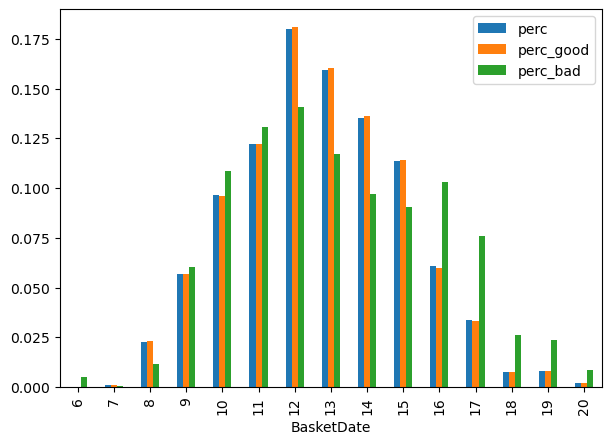

In [83]:
hours = df2.groupby(df2["BasketDate"].dt.hour)
hours_df = pd.DataFrame(hours['BasketDate'].count())
for i, data in hours:
    hours_df.loc[i, 'bd_good'] = data[data['BasketID'].apply(good_bid)]['BasketDate'].count()
    hours_df.loc[i, 'bd_bad'] = hours_df.loc[i, 'BasketDate'] - hours_df.loc[i, 'bd_good']
hours_df['perc'] = hours_df['BasketDate'].apply(lambda x: x/hours_df['BasketDate'].sum())
hours_df['perc_good'] = hours_df['bd_good'].apply(lambda x: x/hours_df['bd_good'].sum())
hours_df['perc_bad'] = hours_df['bd_bad'].apply(lambda x: x/hours_df['bd_bad'].sum())
hours_df.loc[:, 'perc':'perc_bad'].plot(kind='bar')

### Observation


In [84]:
pd.cut(df['BasketDate'].dt.hour, bins=[6, 9, 12, 15, 18, 21], labels=['Early morning', 'Morning', 'Luch time', 'Evening', 'Late evening'])

0         Early morning
1         Early morning
2         Early morning
3         Early morning
4         Early morning
              ...      
471905          Morning
471906          Morning
471907          Morning
471908          Morning
471909          Morning
Name: BasketDate, Length: 466678, dtype: category
Categories (5, object): [Early morning < Morning < Luch time < Evening < Late evening]

# Extract ProdID info

In [85]:
products = pd.DataFrame(df2['ProdID'].unique(), columns=['ProdID'])
products

,ProdID
0,22386
1,21499
2,21498
3,22379
4,20718
...,...
3599,90214U
3600,90214W
3601,90214Z
3602,90089


### Some useful informations:
* In how many baskets does it compare?
* In how many baskets with bad BasketID does is compare?

In [86]:
basks = {}
bad_basks = {}
custs = {}
descrs = {}
prices = {}
pos_qta = {}
neg_qta = {}
for i, data in df2.groupby(df2['ProdID']):
    basks[i] = data['BasketID'].nunique() # number of baskets
    bad_basks[i] = data[~data['BasketID'].apply(good_bid)]['BasketID'].nunique() # number of bad baskets
    custs[i] = data['CustomerID'].nunique() # number of customers
    #-------------------------
    description = ''
    n_max = 0
    for j, freq in data.groupby(data['ProdDescr']):
        if n_max < freq['ProdDescr'].count():
            n_max = freq['ProdDescr'].count()
            description = j
    descrs[i] = description # most frequent description
    #-------------------------
    prices[i] = data['Sale'].mean() # MEDIA
    pos_qta[i] = data[data['Qta'] > 0]['Qta'].sum()
    neg_qta[i] = data[data['Qta'] < 0]['Qta'].sum()
products['Basks'] = products['ProdID'].map(basks)
products['badBasks'] = products['ProdID'].map(bad_basks)
products['Customers'] = products['ProdID'].map(custs)
products['SaleMean'] = products['ProdID'].map(prices)
products['PosQta'] = products['ProdID'].map(pos_qta)
products['NegQta'] = products['ProdID'].map(neg_qta)
products['Description'] = products['ProdID'].map(descrs)

In [87]:
products

,ProdID,Basks,badBasks,Customers,SaleMean,PosQta,NegQta,Description
0,22386,848,12,357,2.019605,19700,-454,JUMBO BAG PINK POLKADOT
1,21499,206,2,168,0.417282,6425,-225,BLUE POLKADOT WRAP
2,21498,324,2,233,0.418457,9997,-50,RED RETROSPOT WRAP
3,22379,385,5,176,2.125891,5779,-64,RECYCLING BAG RETROSPOT
4,20718,371,2,230,1.266043,4107,-11,RED RETROSPOT SHOPPER BAG
...,...,...,...,...,...,...,...,...
3599,90214U,1,0,1,0.290000,12,0,"LETTER ""U"" BLING KEY RING"
3600,90214W,1,0,1,0.290000,12,0,"LETTER ""W"" BLING KEY RING"
3601,90214Z,1,0,1,0.290000,12,0,"LETTER ""Z"" BLING KEY RING"
3602,90089,2,0,2,0.190000,13,0,PINK CRYSTAL SKULL PHONE CHARM


In [88]:
products.describe()

,Basks,badBasks,Customers,SaleMean,PosQta,NegQta
count,3604.000000,3604.000000,3604.000000,3604.000000,3604.000000,3604.000000
mean,102.375139,2.169256,69.947281,3.324136,1344.346004,-69.878746
std,154.132411,5.485043,88.205045,6.836434,3383.085701,1836.007697
min,1.000000,0.000000,1.000000,0.042353,0.000000,-80995.000000
25%,12.000000,0.000000,10.000000,0.943061,61.000000,-12.000000
50%,46.000000,1.000000,38.000000,1.946087,371.000000,-1.000000
75%,130.000000,2.000000,96.000000,3.790385,1354.250000,0.000000
max,1813.000000,167.000000,849.000000,156.111111,80995.000000,0.000000


In [89]:
products['Customers'].mean()

69.9472807991121

# Customer-Product dataset

In [90]:
CustProd = pd.DataFrame(index=customers['CustomerID'], columns=products['ProdID'])
CustProd.fillna(0, inplace=True)

In [91]:
for cust, row in CustProd.iterrows():
    products = df2[df2['CustomerID'] == cust]['ProdID'].unique() # Select all the products bought by a customer
    for prod in products:
        CustProd.at[cust, prod] = 1

KeyboardInterrupt: 

In [ ]:
CustProd

In [ ]:
df2[df2['CustomerID'] == 13313]['ProdID'].unique()